<a href="https://colab.research.google.com/github/NuttharikaTht/MovieIMDbScoreModel/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Movie IMDb Rating Predictation Model**

code study and reference : https://www.kaggle.com/code/saurav9786/imdb-score-prediction-for-movies/notebook


dataset : https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset

# Import Library and Dataset

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

In [57]:
df = pd.read_csv("./movie_metadata.csv")

# Dataset Checking

In [58]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [59]:
df.shape

(5043, 28)

In [60]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


# Data Preparation

## Removing

In [62]:
# Removing Attrb that not relevant

df.drop( 'movie_imdb_link', axis=1, inplace = True)
df.drop('movie_title',axis=1,inplace=True)
df.drop( 'num_critic_for_reviews', axis=1, inplace = True)
df.drop( 'gross', axis=1, inplace = True)
df.drop( 'num_voted_users', axis=1, inplace = True)
df.drop( 'num_user_for_reviews', axis=1, inplace = True)
df.drop( 'title_year', axis=1, inplace = True)
#df.drop( 'movie_facebook_likes', axis=1, inplace = True)
df.drop( 'cast_total_facebook_likes',axis=1,inplace=True)
#df.drop( 'director_facebook_likes',axis=1,inplace=True)
#df.drop( 'actor_3_facebook_likes',axis=1,inplace=True)
#df.drop( 'actor_1_facebook_likes',axis=1,inplace=True)
#df.drop( 'actor_2_facebook_likes',axis=1,inplace=True)
df.drop( 'aspect_ratio',axis=1,inplace=True)
#df.drop( 'facenumber_in_poster',axis=1,inplace=True)

In [63]:
df.drop( 'director_name', axis=1, inplace = True)
df.drop( 'actor_1_name', axis=1, inplace = True)
df.drop( 'actor_2_name', axis=1, inplace = True)
df.drop( 'actor_3_name', axis=1, inplace = True)

In [64]:
df.columns

Index(['color', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'genres',
       'facenumber_in_poster', 'plot_keywords', 'language', 'country',
       'content_rating', 'budget', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes'],
      dtype='object')

In [65]:
# Checking NaN Value in each Attrb
df.isna().any()

color                       True
duration                    True
director_facebook_likes     True
actor_3_facebook_likes      True
actor_1_facebook_likes      True
genres                     False
facenumber_in_poster        True
plot_keywords               True
language                    True
country                     True
content_rating              True
budget                      True
actor_2_facebook_likes      True
imdb_score                 False
movie_facebook_likes       False
dtype: bool

In [66]:
#Checking Number of NaN Value in each Attrb
df.isna().sum()

color                       19
duration                    15
director_facebook_likes    104
actor_3_facebook_likes      23
actor_1_facebook_likes       7
genres                       0
facenumber_in_poster        13
plot_keywords              153
language                    12
country                      5
content_rating             303
budget                     492
actor_2_facebook_likes      13
imdb_score                   0
movie_facebook_likes         0
dtype: int64

In [67]:
new_df = df.dropna()

In [68]:
new_df.isna().sum()

color                      0
duration                   0
director_facebook_likes    0
actor_3_facebook_likes     0
actor_1_facebook_likes     0
genres                     0
facenumber_in_poster       0
plot_keywords              0
language                   0
country                    0
content_rating             0
budget                     0
actor_2_facebook_likes     0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [69]:
new_df.shape

(4256, 15)

In [70]:
df = new_df

In [71]:
df.drop_duplicates(inplace=True)
df.shape

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(4158, 15)

In [72]:
#Check Amount in Each Language of Movies
df["language"].value_counts()

English       3973
French          40
Spanish         28
Mandarin        16
Japanese        13
German          10
Italian          8
Cantonese        7
Hindi            7
Portuguese       6
Russian          5
Korean           5
Norwegian        4
Persian          3
Danish           3
Thai             3
Dutch            3
Zulu             2
Aboriginal       2
None             2
Indonesian       2
Dari             2
Hebrew           2
Mongolian        1
Romanian         1
Vietnamese       1
Arabic           1
Filipino         1
Czech            1
Maya             1
Kazakh           1
Aramaic          1
Hungarian        1
Bosnian          1
Swedish          1
Name: language, dtype: int64

In [73]:
#Drop Language Column because Most of Movie is in English

df.drop('language',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [74]:
df["country"].value_counts()

USA               3251
UK                 355
France             116
Canada              89
Germany             85
Australia           46
Spain               25
Japan               18
Italy               16
China               14
Hong Kong           13
New Zealand         12
Denmark              9
South Korea          9
South Africa         8
Norway               7
Mexico               7
Ireland              7
India                7
Russia               6
Brazil               6
Argentina            4
Iran                 4
Thailand             4
Netherlands          4
Czech Republic       3
Taiwan               2
Israel               2
Hungary              2
West Germany         2
Romania              2
Belgium              1
Iceland              1
Sweden               1
Switzerland          1
Afghanistan          1
Indonesia            1
Kyrgyzstan           1
New Line             1
Poland               1
Colombia             1
Soviet Union         1
Finland              1
Bahamas    

In [75]:
#Drop Country Column because Most of Movie is in USA

df.drop('country',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [76]:
df["color"].value_counts()

Color               3986
 Black and White     172
Name: color, dtype: int64

In [77]:
#Drop Country Column because Most of Movie is in Color
df.drop('color',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [78]:
#Drop Plot Keywords Column because it has too many unique variables per movie
df.drop('plot_keywords',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [79]:
df.head()

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,genres,facenumber_in_poster,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,178.0,0.0,855.0,1000.0,Action|Adventure|Fantasy|Sci-Fi,0.0,PG-13,237000000.0,936.0,7.9,33000
1,169.0,563.0,1000.0,40000.0,Action|Adventure|Fantasy,0.0,PG-13,300000000.0,5000.0,7.1,0
2,148.0,0.0,161.0,11000.0,Action|Adventure|Thriller,1.0,PG-13,245000000.0,393.0,6.8,85000
3,164.0,22000.0,23000.0,27000.0,Action|Thriller,0.0,PG-13,250000000.0,23000.0,8.5,164000
5,132.0,475.0,530.0,640.0,Action|Adventure|Sci-Fi,1.0,PG-13,263700000.0,632.0,6.6,24000


In [80]:
df.shape

(4158, 11)

In [81]:
df.columns

Index(['duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'genres', 'facenumber_in_poster',
       'content_rating', 'budget', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes'],
      dtype='object')

## Content Rating Column

In [82]:
df = pd.get_dummies(data = df, columns = ['content_rating'] , prefix = ['content_rating'] , drop_first = True)

## **Split genres to Columns (One-Hot)**

In [83]:
df['genres'] = df['genres'].str.replace('|', ',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [84]:
from sklearn.preprocessing import MultiLabelBinarizer

In [85]:
mlb = MultiLabelBinarizer()

In [86]:
df1 = df.join(pd.DataFrame(mlb.fit_transform(df['genres'].str.split(',')),
                           columns=mlb.classes_))

In [87]:
df1.columns

Index(['duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'genres', 'facenumber_in_poster', 'budget',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes',
       'content_rating_G', 'content_rating_GP', 'content_rating_M',
       'content_rating_NC-17', 'content_rating_Not Rated', 'content_rating_PG',
       'content_rating_PG-13', 'content_rating_Passed', 'content_rating_R',
       'content_rating_TV-14', 'content_rating_TV-G', 'content_rating_TV-PG',
       'content_rating_Unrated', 'content_rating_X', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [88]:
for g in mlb.classes_:
  df1[g].fillna("0.0", inplace = True) 

In [89]:
df1.dtypes

duration                    float64
director_facebook_likes     float64
actor_3_facebook_likes      float64
actor_1_facebook_likes      float64
genres                       object
facenumber_in_poster        float64
budget                      float64
actor_2_facebook_likes      float64
imdb_score                  float64
movie_facebook_likes          int64
content_rating_G              uint8
content_rating_GP             uint8
content_rating_M              uint8
content_rating_NC-17          uint8
content_rating_Not Rated      uint8
content_rating_PG             uint8
content_rating_PG-13          uint8
content_rating_Passed         uint8
content_rating_R              uint8
content_rating_TV-14          uint8
content_rating_TV-G           uint8
content_rating_TV-PG          uint8
content_rating_Unrated        uint8
content_rating_X              uint8
Action                       object
Adventure                    object
Animation                    object
Biography                   

In [90]:
df = df1

In [91]:
df.drop('genres',axis=1,inplace=True)

In [92]:
df["Action"] = df["Action"].astype(str).astype(float)
df["Adventure"] = df["Adventure"].astype(str).astype(float)
df["Animation"] = df["Animation"].astype(str).astype(float)
df["Biography"] = df["Biography"].astype(str).astype(float)
df["Comedy"] = df["Comedy"].astype(str).astype(float)
df["Crime"] = df["Crime"].astype(str).astype(float)
df["Documentary"] = df["Documentary"].astype(str).astype(float)
df["Drama"] = df["Drama"].astype(str).astype(float)
df["Family"] = df["Family"].astype(str).astype(float)
df["Fantasy"] = df["Fantasy"].astype(str).astype(float)
df["Film-Noir"] = df["Film-Noir"].astype(str).astype(float)
df["History"] = df["History"].astype(str).astype(float)
df["Horror"] = df["Horror"].astype(str).astype(float)
df["Music"] = df["Music"].astype(str).astype(float)
df["Musical"] = df["Musical"].astype(str).astype(float)
df["Mystery"] = df["Mystery"].astype(str).astype(float)
df["Romance"] = df["Romance"].astype(str).astype(float)
df["Sci-Fi"] = df["Sci-Fi"].astype(str).astype(float)
df["Sport"] = df["Sport"].astype(str).astype(float)
df["Thriller"] = df["Thriller"].astype(str).astype(float)
df["War"] = df["War"].astype(str).astype(float)
df["Western"] = df["Western"].astype(str).astype(float)

In [93]:
df.dtypes

duration                    float64
director_facebook_likes     float64
actor_3_facebook_likes      float64
actor_1_facebook_likes      float64
facenumber_in_poster        float64
budget                      float64
actor_2_facebook_likes      float64
imdb_score                  float64
movie_facebook_likes          int64
content_rating_G              uint8
content_rating_GP             uint8
content_rating_M              uint8
content_rating_NC-17          uint8
content_rating_Not Rated      uint8
content_rating_PG             uint8
content_rating_PG-13          uint8
content_rating_Passed         uint8
content_rating_R              uint8
content_rating_TV-14          uint8
content_rating_TV-G           uint8
content_rating_TV-PG          uint8
content_rating_Unrated        uint8
content_rating_X              uint8
Action                      float64
Adventure                   float64
Animation                   float64
Biography                   float64
Comedy                      

## Binning IMDb Rating

In [94]:
df["imdb_binned_score"]=pd.cut(df['imdb_score'], bins=[0,4,6,8,10], right=True, labels=False)+1

In [95]:
df.drop('imdb_score',axis=1,inplace=True)

##Correlation Check

In [96]:
corr =df.corr()

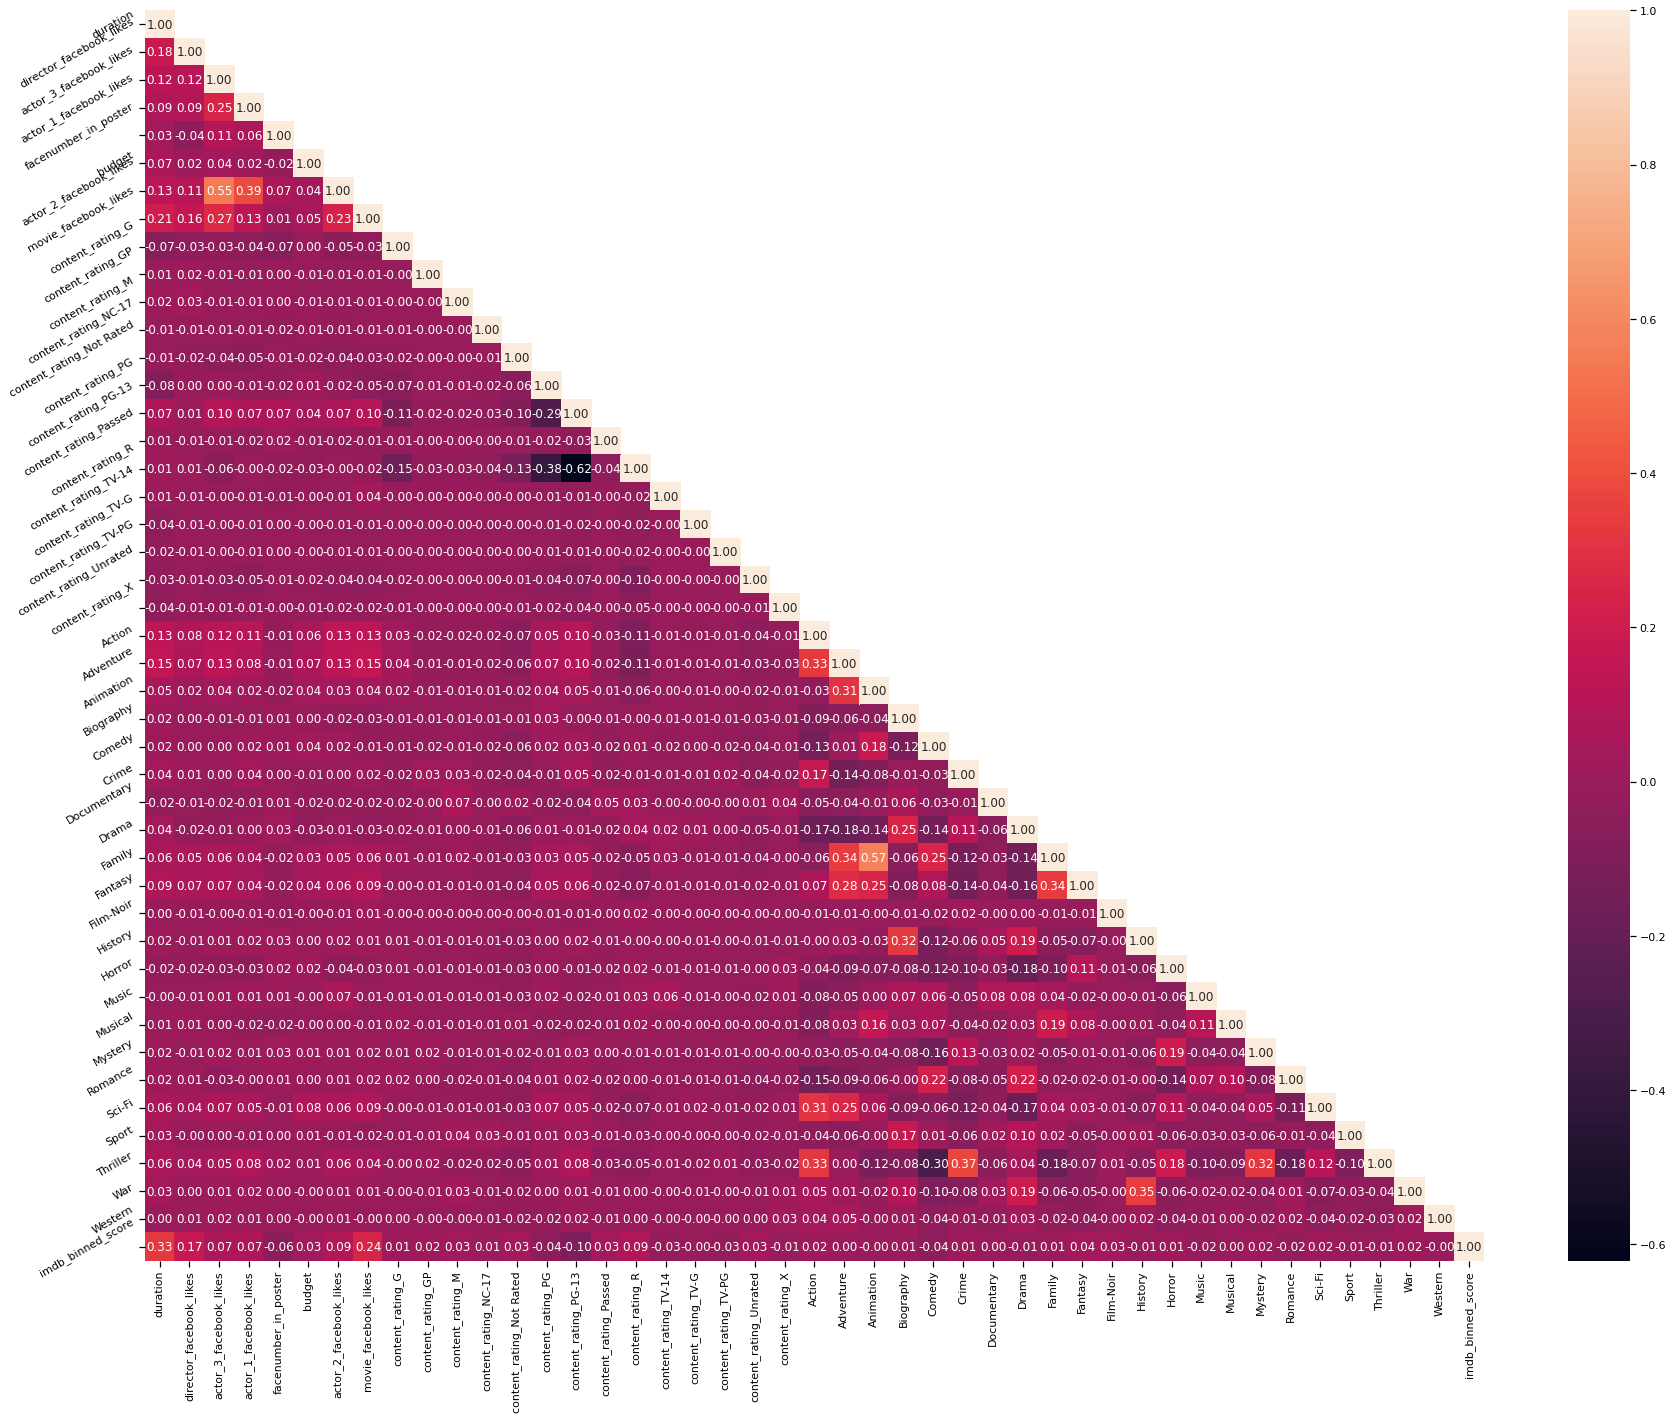

In [97]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(30,23))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [98]:
m = ~(corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.7).any()

In [99]:
m

duration                    True
director_facebook_likes     True
actor_3_facebook_likes      True
actor_1_facebook_likes      True
facenumber_in_poster        True
budget                      True
actor_2_facebook_likes      True
movie_facebook_likes        True
content_rating_G            True
content_rating_GP           True
content_rating_M            True
content_rating_NC-17        True
content_rating_Not Rated    True
content_rating_PG           True
content_rating_PG-13        True
content_rating_Passed       True
content_rating_R            True
content_rating_TV-14        True
content_rating_TV-G         True
content_rating_TV-PG        True
content_rating_Unrated      True
content_rating_X            True
Action                      True
Adventure                   True
Animation                   True
Biography                   True
Comedy                      True
Crime                       True
Documentary                 True
Drama                       True
Family    

# Preprocessing

In [110]:
df.columns

Index(['duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'facenumber_in_poster', 'budget',
       'actor_2_facebook_likes', 'movie_facebook_likes', 'content_rating_G',
       'content_rating_GP', 'content_rating_M', 'content_rating_NC-17',
       'content_rating_Not Rated', 'content_rating_PG', 'content_rating_PG-13',
       'content_rating_Passed', 'content_rating_R', 'content_rating_TV-14',
       'content_rating_TV-G', 'content_rating_TV-PG', 'content_rating_Unrated',
       'content_rating_X', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western',
       'imdb_binned_score'],
      dtype='object')

In [111]:
X=pd.DataFrame(columns=['duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'facenumber_in_poster', 'budget',
       'actor_2_facebook_likes', 'movie_facebook_likes',
       'content_rating_G', 'content_rating_GP', 'content_rating_M',
       'content_rating_NC-17', 'content_rating_Not Rated', 'content_rating_PG',
       'content_rating_PG-13', 'content_rating_Passed', 'content_rating_R',
       'content_rating_TV-14', 'content_rating_TV-G', 'content_rating_TV-PG',
       'content_rating_Unrated', 'content_rating_X', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'] ,data=df)
y=pd.DataFrame(columns=['imdb_binned_score'],data=df)

## Label Encoder

In [112]:
from sklearn import preprocessing

In [113]:
lab = preprocessing.LabelEncoder()

In [114]:
y_transformed = lab.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Splitting the data into training and test data

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=100)

# Feature scaling

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Model

In [118]:
from sklearn import metrics

## Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [121]:
y_pred = logistic.predict(X_test)

In [122]:
matrix = metrics.confusion_matrix(y_test, y_pred)

In [123]:
print(matrix)

[[  0  14  21   0]
 [  1  90 274   1]
 [  0  59 719   5]
 [  0   0  59   5]]


In [124]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6522435897435898


## KNN

In [125]:
from sklearn.neighbors import KNeighborsClassifier

In [126]:
knn = KNeighborsClassifier (n_neighbors=45)
knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=45)

In [127]:
knn_pred = knn.predict(X_test)

In [128]:
matrix = metrics.confusion_matrix(y_test, knn_pred)
print(matrix)
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))

[[  0   3  32   0]
 [  0  22 344   0]
 [  0  18 765   0]
 [  0   0  64   0]]
Accuracy: 0.6306089743589743


## SVC

In [129]:
from sklearn.svm import SVC

In [130]:
svc = SVC(kernel = 'sigmoid')

In [131]:
svc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='sigmoid')

In [132]:
svc_pred = svc.predict(X_test)

In [133]:
matrix = metrics.confusion_matrix(y_test, svc_pred)
print(matrix)
print("Accuracy:",metrics.accuracy_score(y_test, svc_pred))

[[  0   7  28   0]
 [  0  44 322   0]
 [  0  51 730   2]
 [  0   3  60   1]]
Accuracy: 0.6209935897435898


## Naive Bayes

In [134]:
from sklearn.naive_bayes import GaussianNB

In [135]:
nb = GaussianNB()

In [136]:
nb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [137]:
nb_pred = nb.predict(X_test)

In [144]:
matrix = metrics.confusion_matrix(y_test, nb_pred)
print(matrix)
print("Accuracy:",metrics.accuracy_score(y_test, nb_pred))

[[ 31   2   1   1]
 [297  22   3  44]
 [574  40  10 159]
 [ 35   2   2  25]]
Accuracy: 0.07051282051282051


## Decision Tree

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [146]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [147]:
dtree_pred = dtree.predict(X_test)

In [148]:
matrix = metrics.confusion_matrix(y_test, dtree_pred)
print(matrix)
print("Accuracy:",metrics.accuracy_score(y_test, dtree_pred))

[[  3  13  18   1]
 [ 19 137 208   2]
 [ 25 180 542  36]
 [  1   7  41  15]]
Accuracy: 0.5584935897435898


## Random Forest

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
rainforest = RandomForestClassifier(n_estimators = 200)

In [151]:
rainforest.fit(X_train, np.ravel(y_train,order='C'))

RandomForestClassifier(n_estimators=200)

In [152]:
rainforest_pred = rainforest.predict(X_test)

In [153]:
matrix = metrics.confusion_matrix(y_test, rainforest_pred)
print(matrix)
print("Accuracy:",metrics.accuracy_score(y_test, rainforest_pred))

[[  0  16  19   0]
 [  1 122 243   0]
 [  0  63 720   0]
 [  0   0  62   2]]
Accuracy: 0.6762820512820513


## Bagging

In [154]:
from sklearn.ensemble import BaggingClassifier

In [155]:
new_df = df.pop("imdb_binned_score")

In [156]:
bagging = BaggingClassifier(n_estimators=50, max_samples=.10 , oob_score=True)

In [157]:
bagging = bagging.fit(df, new_df)

In [158]:
print(bagging.oob_score_)

0.6911976911976911


## Gradient Boosting

In [159]:
from sklearn.ensemble import GradientBoostingClassifier

In [160]:
boosting = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth = 7)
boosting = boosting.fit(X_train,np.ravel(y_train,order='C'))

In [161]:
boosting_pred = boosting.predict(X_test)

In [162]:
matrix = metrics.confusion_matrix(y_test, boosting_pred)
print(matrix)
print("Accuracy:",metrics.accuracy_score(y_test, boosting_pred))

[[  0  18  17   0]
 [  2 156 207   1]
 [  1 105 669   8]
 [  0   0  48  16]]
Accuracy: 0.6738782051282052


## Model Comparison

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print('Logistic  Reports\n',classification_report(y_test, y_pred))
print('KNN Reports\n',classification_report(y_test, knn_pred))
print('SVC Reports\n',classification_report(y_test, svc_pred))
print('Naive BayesReports\n',classification_report(y_test, nb_pred))
print('Decision Tree Reports\n',classification_report(y_test, dtree_pred))
print('Random Forests Reports\n',classification_report(y_test, rainforest_pred))
print('Bagging Clasifier',bagging.oob_score_) 
print('Gradient Boosting',classification_report(y_test, boosting_pred))

Logistic  Reports
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        35
           2       0.55      0.25      0.34       366
           3       0.67      0.92      0.77       783
           4       0.45      0.08      0.13        64

    accuracy                           0.65      1248
   macro avg       0.42      0.31      0.31      1248
weighted avg       0.61      0.65      0.59      1248

KNN Reports
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        35
           2       0.51      0.06      0.11       366
           3       0.63      0.98      0.77       783
           4       0.00      0.00      0.00        64

    accuracy                           0.63      1248
   macro avg       0.29      0.26      0.22      1248
weighted avg       0.55      0.63      0.51      1248

SVC Reports
               precision    recall  f1-score   support

           1       0.00      0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

##Model Saving

In [165]:
import pickle

In [166]:
fn = 'logistic.sav'
pickle.dump(logistic, open(fn, 'wb'))

In [167]:
fn = 'knn.sav'
pickle.dump(knn, open(fn, 'wb'))

In [168]:
fn = 'svc.sav'
pickle.dump(knn, open(fn, 'wb'))

In [169]:
fn = 'nb.sav'
pickle.dump(knn, open(fn, 'wb'))

In [170]:
fn = 'dtree.sav'
pickle.dump(knn, open(fn, 'wb'))

In [171]:
fn = 'rainforest.sav'
pickle.dump(knn, open(fn, 'wb'))

In [172]:
fn = 'bagging.sav'
pickle.dump(knn, open(fn, 'wb'))

In [173]:
fn = 'boosting.sav'
pickle.dump(knn, open(fn, 'wb'))